# 2σ法の判定

## tsvファイルの読み込み <Br>
ヘッダーはID、Category、val01、val02、val3、val04を想定<br>
ファイルはヘッダー無しのtsvファイルを結合させて読み込む

In [13]:
import os
import glob
import csv
import pandas as pd
DATA_PATH = "./tsv/"
All_Files = glob.glob('{}*.tsv'.format(DATA_PATH))

In [55]:
#print(All_Files)
# フォルダ中の全csvをマージ
list = []
for file in All_Files:
    list.append(pd.read_csv(file,sep='\t',header=None,names=('ID', 'Category', 'val01', 'val02', 'val03', 'val04')))
df = pd.concat(list, sort=False)

# 結合tsv出力
#df.to_csv('ketugou.tsv', encoding='utf_8')

In [56]:
# 分類(Category)を指定してデータを絞る
df_category = df[df['Category'] == 'Category2']

In [71]:
# 特定のカラムを取得する
target_col_name = 'val01'
df_target = df_category[target_col_name]

## データの分析

In [72]:
# 平均
mean = df_target.mean()
# 中央値
median = df_target.median()
# 最大値
dfmax = df_target.max()
# 最小値
dfmin = df_target.min()
# データ数
N = df_target.count()
# 標準偏差
std = df_target.std()
# 分散
var = df_target.var()

# 表示
print("平均 : ",mean)
print("中央値 : ",median)
print("最大値 : ",dfmax)
print("最小値 : ",dfmin)
print("データ数 : ",N)
print("標準偏差 : ",std)
print("分散 : ",var)

平均 :  100.80559735179055
中央値 :  101.0
最大値 :  200
最小値 :  0
データ数 :  3323
標準偏差 :  58.644877683166726
分散 :  3439.221678473587


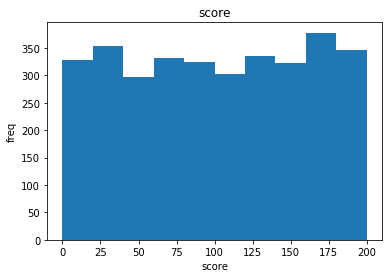

In [73]:
%matplotlib inline
# グラフ描画のためmatplotlibのpyplotをインポート
import matplotlib.pyplot as plt

data = df_target.tolist()

# タイトル追加
plt.title('score')

# x軸にscore、y軸にfreq
plt.xlabel('score')
plt.ylabel('freq')


# ヒストグラムを描画する（表示する幅は50〜100）
plt.hist(data, range=(dfmin, dfmax));

## 異常値を検出

### 1σ(全体の68.26%)から漏れたもの

In [101]:
one_sigma_min = mean - std
one_sigma_max = mean + std

# 範囲内のデータを絞り込む
one_min_df = df_category[df_category[target_col_name] < one_sigma_min]
one_max_df = df_category[df_category[target_col_name] > one_sigma_max]

print("範囲 : %d ～ %d　外のデータを取得"% (one_sigma_min,one_sigma_max))
#print(one_min_df)
#print(one_max_df)

# 結合csv出力
one_shigma = pd.concat([one_min_df,one_max_df])
one_shigma.to_csv('1σ異常検知.csv', encoding='utf_8')

範囲 : 42 ～ 159　外のデータを取得


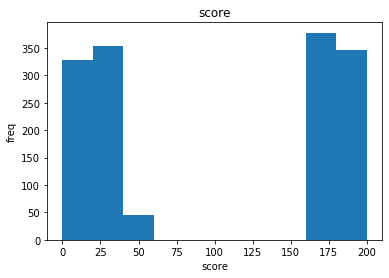

In [104]:
%matplotlib inline
# グラフ描画のためmatplotlibのpyplotをインポート
import matplotlib.pyplot as plt

data = one_shigma[target_col_name].tolist()

# タイトル追加
plt.title('score')

# x軸にscore、y軸にfreq
plt.xlabel('score')
plt.ylabel('freq')


# ヒストグラムを描画する（表示する幅は50〜100）
plt.hist(data, range=(dfmin, dfmax));

### 2σ(全体の95.44%)から漏れたもの

In [103]:
two_sigma_min = mean - (std * 2)
two_sigma_max = mean + (std * 2)

# 範囲内のデータを絞り込む
two_min_df = df_category[df_category[target_col_name] < two_sigma_min]
two_max_df = df_category[df_category[target_col_name] > two_sigma_max]

print("範囲 : %d ～ %d　外のデータを取得"% (two_sigma_min,two_sigma_max))
#print(two_min_df)
#print(two_max_df)

# 結合csv出力
two_shigma = pd.concat([two_min_df,two_max_df])
two_shigma.to_csv('2σ異常検知.csv', encoding='utf_8')

範囲 : -16 ～ 218　外のデータを取得


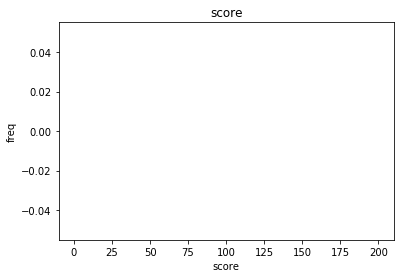

In [106]:
%matplotlib inline
# グラフ描画のためmatplotlibのpyplotをインポート
import matplotlib.pyplot as plt

data = two_shigma[target_col_name].tolist()

# タイトル追加
plt.title('score')

# x軸にscore、y軸にfreq
plt.xlabel('score')
plt.ylabel('freq')


# ヒストグラムを描画する（表示する幅は50〜100）
plt.hist(data, range=(dfmin, dfmax));